# TO DO

- question 1: need tips for making better plots, choosing variety of plots to represented different things. I have a plot that compares some distribution but they have different x axis scales. 
- question 2: try normalising the data for the stacked bar plots. Normalising is just dividing by the total? 

check sns galeries of different types of plots, good to 

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

C:\Users\Rudol\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


In [4]:
seifa[seifa['LGA'] == 'ONKAPARINGA']

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
1392,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,975,ONKAPARINGA
1393,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,672,ONKAPARINGA
1394,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1152,ONKAPARINGA
1395,45340,Onkaparinga (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,159517,ONKAPARINGA
3648,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,SCORE,Score,993,ONKAPARINGA
3649,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MINS,Minimum score for SA1s in area,637,ONKAPARINGA
3650,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,MAXS,Maximum score for SA1s in area,1141,ONKAPARINGA
3651,45340,Onkaparinga (C),IRSD,Index of Relative Socio-economic Disadvantage,URP,Usual resident population,159517,ONKAPARINGA
5904,45340,Onkaparinga (C),IER,Index of Economic Resources,SCORE,Score,996,ONKAPARINGA
5905,45340,Onkaparinga (C),IER,Index of Economic Resources,MINS,Minimum score for SA1s in area,674,ONKAPARINGA


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [5]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [6]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_pop.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,19606.0,19606.0,19606.0,19606.0
ADELAIDE HILLS,38601.0,38601.0,38601.0,38601.0
ALBANY,33614.0,33614.0,33614.0,33614.0
ALBURY,47851.0,47851.0,47851.0,47851.0
ALEXANDRINA,23693.0,23693.0,23693.0,23693.0


In [7]:
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [8]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


We can use the `.describe()` function to get a general idea of what the dataframe looks like

In [9]:
sa_vouchers_scores.describe()

,Participant_ID,Voucher_Value,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
count,1.275260e+05,127526.000000,127526.000000,118066.000000,118066.000000,118066.000000,118066.000000,118066.000000
mean,1.063764e+06,49.663951,2015.915100,981.049942,981.049942,971.090416,981.756314,68014.296046
std,3.681374e+04,2.700970,0.765087,44.454505,44.454505,56.889280,55.538098,50470.140017
min,1.000002e+06,5.000000,2015.000000,870.000000,870.000000,808.000000,798.000000,871.000000
25%,1.031883e+06,50.000000,2015.000000,955.000000,955.000000,927.000000,937.000000,22070.000000
50%,1.063764e+06,50.000000,2016.000000,974.000000,974.000000,973.000000,987.000000,62912.000000
75%,1.095646e+06,50.000000,2017.000000,1013.000000,1013.000000,997.000000,1018.000000,104922.000000
max,1.127526e+06,50.000000,2017.000000,1083.000000,1083.000000,1090.000000,1096.000000,159517.000000


**Removing any uppercase words for ease of referencing the DF.**

help from https://www.codegrepper.com/code-examples/python/convert+columns+to+lowercase+pandas

In [10]:
# sa_vouchers.index = sa_vouchers.index.str.lower()

# sa_vouchers_scores.index = sa_vouchers_scores.index.str.lower()

# seifa.index = seifa.index.str.lower()

LGA_scores.index = LGA_scores.index.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

sa_vouchers_scores.columns = sa_vouchers_scores.columns.str.lower()

seifa.columns = seifa.columns.str.lower()

sa_vouchers.columns = sa_vouchers.columns.str.lower()

LGA_scores.columns = LGA_scores.columns.str.lower()

### failed loop for trying to find the duplicate LGAs with different population size. 

### does what the failed loop was supposed to do 

# Index Definition

From here https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/2033.0.55.001~2016~Main%20Features~IRSAD~20

4 major indexes for every LGA. 

**IRSAD: index of relative socio economic advantage and disadvantage.**
- summarises information about the economic and social conditions of people and households within an area. Includes both relative advantage and disadvantage. 
- low score = greater disadvatange, lack of advantage in general. 
- low scores = many households with low incomes, many people in unskilled occupations. OR few households with high incomes. Few people in skilled occupations. 

**IEO: Index of education and occupation.**
- reflects the educational and occupational level of communities. 
- Education variables in this index show either the level of qualification achieved or wheteher further education is being undertaken. 
- Low score = relatively lower education and occupation status. 
- low score = many people without qualifications or many people in low skilled occuaptions or unemployed. AND few people with high level of qualification or highly skilled occupation. 

**IER: Index of economic resources.**
- focus' on the financial aspects of relative socio-economic advantage and disadvantage. Summarises variables related to income and wealth. 
- low score = relative lack to economic resources in general. 
- low score = many households with low income, or many paying low rent. AND few households with high income, or few owned homes. 

**IRSD: The index of relative socio economic disadvantage.**
- range of information about the economic and social conditions of people and households. 
- low score = relatively greater disadvantage in general. 
- low sore= many households with low income, people with no qualification OR many people in low skill occupations. 

**Local Government Areas - 2011** 
- Cities (C)
- Rural Cities (RC)
- Municipalities/Municipal Councils (M)
- District Councils (DC)
- Regional Councils (RegC)
- Towns (T)
- Aboriginal Councils (AC)

# Question 1

 Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

### setting up the DFs

We know each row means a voucher has been claimed. 

Start off by checking how many unique LGAs there are. Then we can count how many times the LGA occurs. 

In [11]:
len(set(sa_vouchers_scores['participant_lga']))

69

It's quite difficult to use this type of dataframe due to the multi index. We can use `pivot` instead to make it more clear. 

Used help from the textbook for this part. Page 24, section 2.6.8



In [12]:
group = (sa_vouchers_scores.groupby(['participant_lga','voucher_sport']).count()).copy(deep=True)

In [13]:
group.head()

participant_id  participant_suburb  \
participant_lga voucher_sport                                          
ADELAIDE        Athletics                     16                  16   
                Australian Rules             130                 130   
                Baseball                       1                   1   
                Basketball                     4                   4   
                Calisthenics                   1                   1   

                                  club_previous_member  \
participant_lga voucher_sport                            
ADELAIDE        Athletics                           16   
                Australian Rules                   130   
                Baseball                             1   
                Basketball                           4   
                Calisthenics                         1   

                                  participant_atsi_indicator  \
participant_lga voucher_sport                                  
ADELAIDE        Athletics                                 16   
                Australian Rules                         130   
                Baseball                                   1   
                Basketball                                 4   
                Calisthenics                               1   

                                  participant_cald_indicator  participant_sex  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                                 16               16   
                Australian Rules                         130              130   
                Baseball                                   1                1   
                Basketball                                 4                4   
                Calisthenics                               1                1   

                                  voucher_value  club_name  \
participant_lga voucher_sport                                
ADELAIDE        Athletics                    16         16   
                Australian Rules            130        130   
                Baseball                      1          1   
                Basketball                    4          4   
                Calisthenics                  1          1   

                                  participant_electorate  \
participant_lga voucher_sport                              
ADELAIDE        Athletics                             16   
                Australian Rules                     130   
                Baseball                               1   
                Basketball                             4   
                Calisthenics                           1   

                                  voucher_completion_date  voucher_claim_year  \
participant_lga voucher_sport                                                   
ADELAIDE        Athletics                              16                  16   
                Australian Rules                      128                 130   
                Baseball                                1                   1   
                Basketball                              4                   4   
                Calisthenics                            1                   1   

                                  ieo  ier  irsad  irsd  population  
participant_lga voucher_sport                                        
ADELAIDE        Athletics          16   16     16    16          16  
                Australian Rules  130  130    130   130         130  
                Baseball            1    1      1     1           1  
                Basketball          4    4      4     4           4  
                Calisthenics        1    1      1     1           1

keeping all rows and only keeping one column. All the columns represent the same number of counts, so we only need to keep one. 

In [14]:
pivot = pd.pivot_table(group, values = 'participant_id', index = 'participant_lga', columns = 'voucher_sport')

In [15]:
pivot.head()

voucher_sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
participant_lga,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,NaN,16.0,130.0,NaN,NaN,1.0,4.0,NaN,1.0,2.0,...,NaN,NaN,NaN,11.0,4.0,NaN,NaN,NaN,NaN,NaN
ADELAIDE HILLS,3.0,204.0,1412.0,2.0,NaN,11.0,48.0,NaN,62.0,128.0,...,NaN,18.0,3.0,44.0,257.0,2.0,1.0,1.0,NaN,NaN
ADELAIDE PLAINS,NaN,3.0,485.0,NaN,NaN,3.0,15.0,NaN,23.0,3.0,...,NaN,3.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,9.0,62.0,980.0,4.0,3.0,NaN,204.0,NaN,5.0,8.0,...,2.0,11.0,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
BAROSSA,NaN,158.0,1196.0,3.0,NaN,6.0,341.0,NaN,9.0,56.0,...,NaN,12.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN


In [16]:
pivot = pivot.fillna(0)

Applying the pivot table has drastically aided in the dimensioniality of the DF,m making it easier to explore the DF. I have also changed the NAN values to zero, making the assumption that the nan values represent no voucher redeemed. 

Let's try some plots with this new df now. 

In [17]:
pivot.index = pivot.index.str.lower()
pivot.columns = pivot.columns.str.lower()

### plotting the sports without normalising (can't use this, not as accurate as normalising)

`.rank()` works such that each column has a new ranking. 1 being the highest rank (and so highest value in the original DF). 

the `idxmax` and `idxmin` function determines the most and least popular sports overall in each LGA and we can easily display which sports are found via the `set` function.

So now we've found which sports stand out. 

Let's plot this to see how these top 5 sports vary in popularity among themselves. 

We can see Australian Rules and Netball are the most popular, badminton and archery being the least popular. We expect this as we know most Australians play these popular sports growing up. Other factors that can be included may be the regions in which these sports are played. Some LGAs may have a higher voucher claim rate for a less popular sport than others. We were able to show the most popular sports across all LGAs, though there may be some LGAs where these top sports are not popular. 

### normallising

how much of vouchers do these sports cover for the overall vouchers claimed? 

because the least popular sports don't have many claims, it would be justifiable to not inclue it in the rest of the analysis for this part. 

would normalising this help? just the dist of vouchers, normalise would be comnparing to the total voucher claims. 

comparing LGAs, would be better to normalise by each of their popuulations. BEcause comparing one LGA which mnight have a large population won't be a fair comparison. 

If we don't know how the vouchers were distributed, better to normlaise with respect to the total vouchers claimed rather than by the population because there could be 2 vouchers per person. 

We want
- the total number of vouchers claimed for all LGAs combined. 
- how the total of vouchers clamed for a specific sport compares to the total clamed
- what does this telll us? 

we know the total number of vouchers clamed is the number of rows in sa_vouchers_scores.

The total vouchers claimed for all sports:

In [18]:
claimDF = pivot.sum().to_frame(name='sum')

In [19]:
claimDF['proportion'] =claimDF['sum'] / claimDF.sum()[0]


checking the mean of the proportion alllows us to see an upper vs lower half of the sports clami rate

with my previous method for find the topSports was using `.idxmax()`. But that function does not take into consideration the proportion, simply the number of vouchers claimed. So we should update the topSports with ths new code

In [20]:
topSports = list(claimDF[claimDF['proportion']> claimDF['proportion'].mean()].nlargest(5, columns='proportion').index)

In [21]:
botSports = list(claimDF[claimDF['proportion']< claimDF['proportion'].mean()].nsmallest(5, columns='proportion').index)

In [22]:
botSports

['bowls', 'dancesport', 'kung fu (wu shu)', 'paralympics', 'badminton']

Making the same previous plot with our update values. 

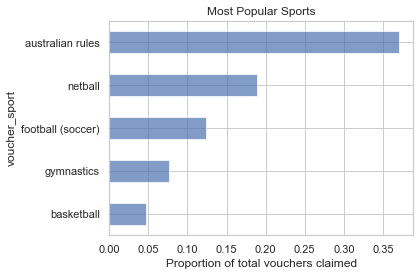

In [23]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


claimDF['proportion'][topSports].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Proportion of total vouchers claimed')
plt.tight_layout()
plt.show()

Least popular sports have been excluded as there are not many claims. Instead, let's group them as an 'other' sport 

In [24]:
topSportsDF= claimDF.loc[topSports]

In [25]:
otherSportsDF = claimDF.loc[~claimDF.index.isin(topSports)].sum(axis=0).to_frame().T

In [26]:
sportsClaim = pd.concat([topSportsDF, otherSportsDF])

In [27]:
sportsClaim = sportsClaim.rename(index={0:'other'})

In [28]:
sportsClaim['percentage'] = round(sportsClaim['proportion']*100, 2)

In [29]:
sportsClaim

,sum,proportion,percentage
australian rules,47224.0,0.370309,37.03
netball,24017.0,0.188330,18.83
football (soccer),15775.0,0.123700,12.37
gymnastics,9823.0,0.077027,7.70
basketball,6016.0,0.047175,4.72
other,24671.0,0.193459,19.35


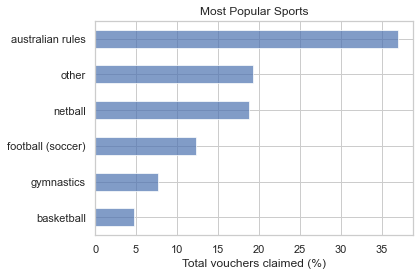

In [30]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


sportsClaim['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Most Popular Sports')

plt.xlabel('Total vouchers claimed (%)')

plt.tight_layout()
plt.show()

We can see Australian Rules and Netball are the most popular, badminton being the least popular found in botSports. We expect this as we know most Australians play these popular sports growing up. Other factors that can be included may be the regions in which these sports are played. Some LGAs may have a higher voucher claim rate for a less popular sport than others. We were able to show the most popular sports across all LGAs, though there may be some LGAs where these top sports are not popular. 

Checking the proportion of vouchers claimed in the top LGAs:

### normalisnig in each LGA

In [31]:
lgaClaim = pivot.sum(axis=1).to_frame(name='sum')

In [32]:
lgaClaim['population'] = LGA_scores['population']

In [33]:
NANpopulation = list(lgaClaim[lgaClaim['population'].isna()].index)

We can drop the NANpopulation because it is only a small number of vouchers (approx. 600) compared to the total vouchers (approx. 130000). We want to drop the NANpopulation because these represent LGAs that were originally in the sa_vouchers DF but not in the sefa DF. 

Dropping NANpopulation should not have an adverse effect on the rest of the data.  

In [34]:
lgaClaim = lgaClaim.drop(NANpopulation)

In [35]:
lgaClaim['proportion'] = lgaClaim['sum']/ lgaClaim['population']

In [36]:
topLGAs = list(lgaClaim['proportion'].nlargest(5).index)

We can use the following code if we want to put alll LGAs (except the top5 ) in an 'other' row. I don't think we would want to do this because a lot of information would be lost in this process. For example, the 6th - 10th top LGAs would have a significant contribution to the values in the 'other' row. 

In [37]:
lgaClaim = lgaClaim.loc[topLGAs]

In [38]:
lgaClaim['percentage'] = round(lgaClaim['proportion']*100,2)

In [39]:
lgaClaim

,sum,population,proportion,percentage
participant_lga,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49
kimba,232.0,1087.0,0.213431,21.34
wudinna,267.0,1256.0,0.212580,21.26
cleve,329.0,1729.0,0.190283,19.03
southern mallee,342.0,2097.0,0.163090,16.31


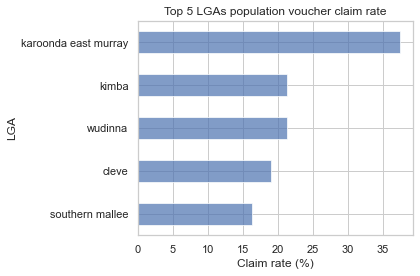

In [40]:
sns.set_theme(style="whitegrid")
fig, axes= plt.subplots(1,1)


ax = lgaClaim['percentage'].sort_values().plot(kind='barh', style='b', alpha=0.7,
              title='Top 5 LGAs population voucher claim rate')

ax.set(ylabel= 'LGA')

plt.xlabel('Claim rate (%)')

plt.tight_layout()
plt.show()

### further plots similar to the normalised plots, but without normalisation (can't use this)

Similarly, let's now begin the process to check which are the top LGAs for claimed vouchers. This meaning we will find the which LGA has the highest number of claims for each sport. 

we notice that some of the LGAs are in each of the top and bottom LGAs. This is fine because an LGA that has the most claim for one sport, may have the lowest number of claims for another sport. Thus, appearing in both idxmax and idxmin 

to check which lga has the most claimed vouchers. Onkaparinga being number one with most claimed vouchers.

The following will tell us the top ad bottom sports for the specific LGA. 

Help with `tight_layout()` from https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

Onkaparinga stands out the most for total claimed vouchers within the LGA. Let's check what the most popular sports are in that LGA: 

normalise the sports instead of counts to percentages, 

We can see Australian Rules dominates in this LGA compared to the other most popular sports. as we can see in the second plot, the top sports across all LGAs aren't all seen in Onkaparinga. Basketball and swimming appear in `topSports` but are not as popular in Onkaparinga as athletics and gymnastics. 

Comparing this plot to the plot for the most popular sports, we also notice Onkaparinga accounts for approximately 1/9$^{th}$ of the total claimed vouchers for Australian rules.

Checking now for the 5 bottom LGAs

The LGA with the least number of voucher claims has only claimed for one sport, being the most popular sport. 

### trying to get one bar plot for AFL to see the contribution from other LGAs and 'other' for the smaller LGAs. 

In [41]:
pivotLGA = pd.pivot_table(group, values = 'participant_id', index = 'voucher_sport', columns = 'participant_lga')

In [42]:
pivotLGA.index = pivotLGA.index.str.lower()
pivotLGA.columns = pivotLGA.columns.str.lower()

In [43]:
pivotLGA = pivotLGA.fillna(0)

In [ ]:
pivotLGA.head()

In [45]:
pivotLGA.loc[topSports]

participant_lga,adelaide,adelaide hills,adelaide plains,alexandrina,barossa,barunga west,berri barmera,burnside,campbelltown,ceduna,...,unley,victor harbor,wakefield,walkerville,wattle range,west torrens,whyalla,wudinna,yankalilla,yorke peninsula
voucher_sport,,,,,,,,,,,,,,,,,,,,,
australian rules,130.0,1412.0,485.0,980.0,1196.0,86.0,545.0,747.0,1186.0,211.0,...,900.0,368.0,402.0,146.0,652.0,907.0,569.0,44.0,214.0,309.0
netball,23.0,1395.0,160.0,860.0,445.0,193.0,529.0,96.0,205.0,107.0,...,350.0,243.0,443.0,41.0,325.0,268.0,509.0,194.0,174.0,313.0
football (soccer),27.0,812.0,93.0,510.0,197.0,11.0,243.0,85.0,319.0,0.0,...,73.0,141.0,4.0,29.0,91.0,425.0,268.0,0.0,5.0,7.0
gymnastics,20.0,176.0,18.0,86.0,117.0,4.0,37.0,272.0,248.0,0.0,...,155.0,45.0,2.0,40.0,71.0,386.0,154.0,0.0,10.0,1.0
basketball,4.0,48.0,15.0,204.0,341.0,12.0,18.0,36.0,40.0,0.0,...,63.0,129.0,61.0,6.0,85.0,70.0,605.0,0.0,1.0,87.0


In [50]:
otherSports

participant_lga,adelaide,adelaide hills,adelaide plains,alexandrina,barossa,barunga west,berri barmera,burnside,campbelltown,ceduna,...,unley,victor harbor,wakefield,walkerville,wattle range,west torrens,whyalla,wudinna,yankalilla,yorke peninsula
0,98.0,913.0,128.0,339.0,578.0,27.0,114.0,977.0,569.0,32.0,...,725.0,102.0,98.0,124.0,174.0,788.0,383.0,29.0,39.0,260.0


In [51]:
otherSports2 = pivotLGA.loc[~pivotLGA.index.isin(topSports)].sum(axis=0).to_frame().T
topSports2 = pivotLGA.loc[topSports]
pivotLGA = pd.concat([topSports2, otherSports2])
pivotLGA = pivotLGA.rename(index={0:'other'})
pivotLGA

participant_lga,adelaide,adelaide hills,adelaide plains,alexandrina,barossa,barunga west,berri barmera,burnside,campbelltown,ceduna,...,unley,victor harbor,wakefield,walkerville,wattle range,west torrens,whyalla,wudinna,yankalilla,yorke peninsula
australian rules,130.0,1412.0,485.0,980.0,1196.0,86.0,545.0,747.0,1186.0,211.0,...,900.0,368.0,402.0,146.0,652.0,907.0,569.0,44.0,214.0,309.0
netball,23.0,1395.0,160.0,860.0,445.0,193.0,529.0,96.0,205.0,107.0,...,350.0,243.0,443.0,41.0,325.0,268.0,509.0,194.0,174.0,313.0
football (soccer),27.0,812.0,93.0,510.0,197.0,11.0,243.0,85.0,319.0,0.0,...,73.0,141.0,4.0,29.0,91.0,425.0,268.0,0.0,5.0,7.0
gymnastics,20.0,176.0,18.0,86.0,117.0,4.0,37.0,272.0,248.0,0.0,...,155.0,45.0,2.0,40.0,71.0,386.0,154.0,0.0,10.0,1.0
basketball,4.0,48.0,15.0,204.0,341.0,12.0,18.0,36.0,40.0,0.0,...,63.0,129.0,61.0,6.0,85.0,70.0,605.0,0.0,1.0,87.0
other,98.0,913.0,128.0,339.0,578.0,27.0,114.0,977.0,569.0,32.0,...,725.0,102.0,98.0,124.0,174.0,788.0,383.0,29.0,39.0,260.0


2d heatmap

In [55]:
lgaClaim

,sum,population,proportion,percentage
participant_lga,,,,
karoonda east murray,388.0,1035.0,0.374879,37.49
kimba,232.0,1087.0,0.213431,21.34
wudinna,267.0,1256.0,0.212580,21.26
cleve,329.0,1729.0,0.190283,19.03
southern mallee,342.0,2097.0,0.163090,16.31


In [58]:
pivotLGA

participant_lga,adelaide,adelaide hills,adelaide plains,alexandrina,barossa,barunga west,berri barmera,burnside,campbelltown,ceduna,...,unley,victor harbor,wakefield,walkerville,wattle range,west torrens,whyalla,wudinna,yankalilla,yorke peninsula
australian rules,130.0,1412.0,485.0,980.0,1196.0,86.0,545.0,747.0,1186.0,211.0,...,900.0,368.0,402.0,146.0,652.0,907.0,569.0,44.0,214.0,309.0
netball,23.0,1395.0,160.0,860.0,445.0,193.0,529.0,96.0,205.0,107.0,...,350.0,243.0,443.0,41.0,325.0,268.0,509.0,194.0,174.0,313.0
football (soccer),27.0,812.0,93.0,510.0,197.0,11.0,243.0,85.0,319.0,0.0,...,73.0,141.0,4.0,29.0,91.0,425.0,268.0,0.0,5.0,7.0
gymnastics,20.0,176.0,18.0,86.0,117.0,4.0,37.0,272.0,248.0,0.0,...,155.0,45.0,2.0,40.0,71.0,386.0,154.0,0.0,10.0,1.0
basketball,4.0,48.0,15.0,204.0,341.0,12.0,18.0,36.0,40.0,0.0,...,63.0,129.0,61.0,6.0,85.0,70.0,605.0,0.0,1.0,87.0
other,98.0,913.0,128.0,339.0,578.0,27.0,114.0,977.0,569.0,32.0,...,725.0,102.0,98.0,124.0,174.0,788.0,383.0,29.0,39.0,260.0


In [66]:
sportsClaim

,sum,proportion,percentage
australian rules,47224.0,0.370309,37.03
netball,24017.0,0.188330,18.83
football (soccer),15775.0,0.123700,12.37
gymnastics,9823.0,0.077027,7.70
basketball,6016.0,0.047175,4.72
other,24671.0,0.193459,19.35


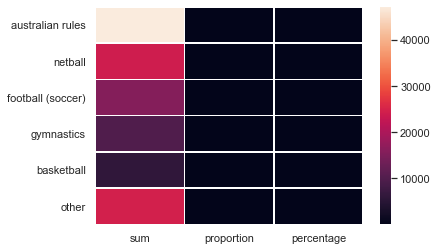

In [65]:
ax = sns.heatmap(sportsClaim, linewidths=.5)

check 2d matrix, our data is 2d so check different 2d plots, see what they look like. 

normalisation for this df would involve proportion to the population of each lga 

OR

divide the values by the sum of each column to get the percentage of claim for each sport in each lga. (easier method)

### help 5



**QUESTION**
***
```
i'm trying to make a single stacked hbar plot to indicate how much the top 5 lgas contribute to the specified sport. The remaining sports are classified as 'other'

```
***

In [69]:
myList = list(pivot['australian rules'].nlargest(5).sort_values(ascending=False).index)

In [71]:
sportsClaim

,sum,proportion,percentage
australian rules,47224.0,0.370309,37.03
netball,24017.0,0.188330,18.83
football (soccer),15775.0,0.123700,12.37
gymnastics,9823.0,0.077027,7.70
basketball,6016.0,0.047175,4.72
other,24671.0,0.193459,19.35


In [181]:
aflTop = pivot['australian rules'].loc[topLGAs].to_frame()

In [182]:
aflAll = pivot['australian rules'].to_frame()

In [190]:
aflAll['population'] = LGA_scores['population']

In [192]:
aflAll['proportion'] = aflAll['australian rules'] / aflAll['population']

In [180]:
test.sum(axis=1)

participant_lga
karoonda east murray    169.0
kimba                    38.0
wudinna                  44.0
cleve                   218.0
southern mallee         158.0
dtype: float64

In [177]:
otherLGAs2 = first.loc[~first.index.isin(topLGAs)].sum(axis=0).to_frame().T

In [178]:
otherLGAs2

,australian rules
0,46597.0


In [161]:
test = pd.concat([test, otherLGAs2])

In [162]:
test

participant_lga,karoonda east murray,kimba,wudinna,cleve,southern mallee
australian rules,169.0,38.0,44.0,218.0,158.0
0,169.0,38.0,44.0,218.0,158.0


In [149]:
otherLGAs2

,australian rules
0,46597.0


In [147]:
test

,australian rules
participant_lga,
adelaide,130.0
adelaide hills,1412.0
adelaide plains,485.0
alexandrina,980.0
barossa,1196.0
...,...
west torrens,907.0
whyalla,569.0
wudinna,44.0


In [121]:
pivot.columns([topLGAs])

TypeError: 'Index' object is not callable

In [138]:
sportsClaim.T

,australian rules,netball,football (soccer),gymnastics,basketball,other
sum,47224.000000,24017.00000,15775.0000,9823.000000,6016.000000,24671.000000
proportion,0.370309,0.18833,0.1237,0.077027,0.047175,0.193459
percentage,37.030000,18.83000,12.3700,7.700000,4.720000,19.350000


In [109]:
pivot[(pivot['australian rules'].to_frame().T)[~topLGAs]]dd

TypeError: bad operand type for unary ~: 'list'

In [97]:
test

participant_lga,karoonda east murray,kimba,wudinna,cleve,southern mallee
australian rules,169.0,38.0,44.0,218.0,158.0


In [ ]:
test['other'] = pivot['australian rules']

<AxesSubplot:title={'center':'test'}>

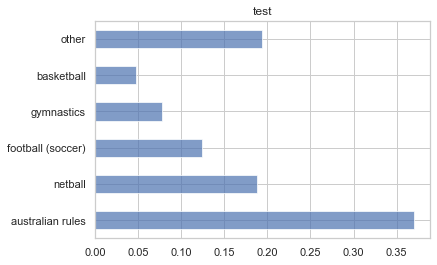

In [143]:
sns.set_theme(style="whitegrid")
# fig, axes = plt.subplots(2,1, figsize=(12, 5))


# pivot['australian rules'].to_frame().transpose().plot.barh(stacked=True,style='b', alpha=0.7,
#               title='Most popular sports in Onkaparinga')

sportsClaim['proportion'].T.plot.barh(stacked=True,style='b', alpha=0.7,
              title='test')

# plt.tight_layout()

In [99]:
claimDF[~claimDF.columns.isin(topLGAs)]

ValueError: Item wrong length 2 instead of 50.

normalising this would better visualise because the population in these sports might be significantly higher compared to others, so the proportion would fix the contribution from those LGAs.

# Question 2

Are some sports more popular in different parts of the state?

We have the ranking for each sport, so we can sort them to see which LGA is most popular. 

Perhaps we can use a for loop for plotting the popluarity of each sport. Do we want to plot all the sports or just the top ten sports? 

### help 4 


**QUESTIONS** 
***
**1.**
trying to get these stacked like in https://seaborn.pydata.org/examples/part_whole_bars.html

below is the plots separately, but i want them all together

**2.** had to use extend multiple times to plot them together.

**3.** I have the total number of vouchers claimed per LGA. If I want to keep the top 5 individually then put the rest as 'other'? 

**4.** need help understanding how to normalise
***

In [40]:
topSports

['netball', 'swimming', 'australian rules', 'football (soccer)', 'basketball']

In [58]:
botSports

['baseball', 'archery', 'bmx', 'badminton']

In [41]:
netball = pivot[topSports[0]].sort_values().nlargest(5)
swimming =pivot[topSports[1]].sort_values().nlargest(5)
soccer= pivot[topSports[2]].sort_values().nlargest(5)
afl= pivot[topSports[3]].sort_values().nlargest(5)
basketball = pivot[topSports[4]].sort_values().nlargest(5)

In [42]:
list1 = list(netball.index.values)
list2 = list(swimming.index.values)
list3 = list(soccer.index.values)
list4 = list(afl.index.values)
list5 = list(basketball.index.values)

# mylist = list1.concatenate([list2, list3, list4, list5])

In [43]:
set(list1)

{'adelaide hills', 'mount barker', 'onkaparinga', 'playford', 'tea tree gully'}

In [44]:
list1.extend(list2)

In [45]:
list1.extend(list3)

In [46]:
list1.extend(list4)

In [47]:
list1.extend(list5)

In [48]:
totalClaimed.sort_values(ascending=False)

Participant_LGA
onkaparinga          12782.0
salisbury             8169.0
tea tree gully        7219.0
playford              6940.0
charles sturt         6897.0
                      ...   
franklin harbour       155.0
orroroo/carrieton      137.0
flinders ranges        102.0
peterborough            45.0
coober pedy             39.0
Length: 69, dtype: float64

<Figure size 1080x720 with 0 Axes>

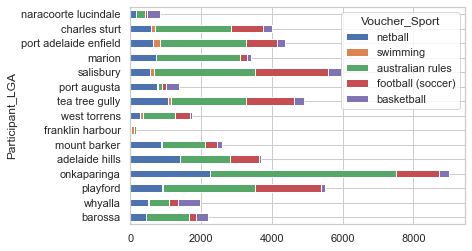

In [57]:
plt.figure(figsize=(15,10))

pivot_top = pivot.loc[set(list1)] 

pivot_top[topSports].plot.barh(stacked=True)


try the normalised charts https://altair-viz.github.io/gallery/normalized_stacked_bar_chart.html

check out matrix plot. one axis is lga and the other its the sport 

since it's not normalised, we don't know the proportions/ popularity

should consider 'other sports' for the less popular sports. 

**trying matrix / heatmap** 

### plotting separately, don't really need this code anymore. 

We now know the most popular sports, and we know the rank of each sport for each LGA. Appllying the rank function to the most popular sports

I think will have to do a loop for each of the sports in `topSports` 

I want stacked bars, with the stacked bars being the sport. The y axis being the LGA, x axis being the x axis. 

II believe certain sports will be too large like australian rules, compared to basketball. 

we can see what is the most popular sports without the `set` function. This will say what sport  is most popular in each LGA

another way... for each sport, which LGA is most popular 

## Shows which top 10 LGA has the most claimed vouchers

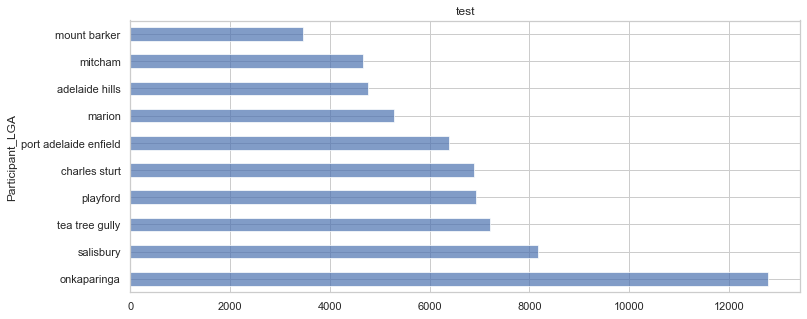

In [42]:
sns.set_theme(style="whitegrid")


fig = plt.figure(figsize=(12, 5))
total = pivot.sum(axis=1).sort_values(ascending=False)
total.nlargest(10).plot(kind='barh', style='b', alpha=0.7,
              title='test')


# plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')

# Question 3

 Are any LGAs over/under represented in their use of vouchers?

Check population to number of vouchers claimed. 

david : need to normalise the vouchers by population in some way 

### Getting the proportion of the population that claimed vouchers and showing top5 over and under represented lgas


In [70]:
LGA_scores.index = LGA_scores.index.str.lower()
LGA_scores.columns = LGA_scores.columns.str.lower()

In [71]:
totalClaimed = totalClaimed.to_frame(name= 'vouchers')

In [72]:
totalClaimed

,vouchers
Participant_LGA,
adelaide,302.0
adelaide hills,4756.0
adelaide plains,899.0
alexandrina,2979.0
barossa,2874.0
...,...
west torrens,2844.0
whyalla,2488.0
wudinna,267.0


In [73]:
totalClaimed['population'] = LGA_scores['population']

no pop number in seifa, then drop 

In [74]:
totalClaimed

,vouchers,population
Participant_LGA,,
adelaide,302.0,19606.0
adelaide hills,4756.0,38601.0
adelaide plains,899.0,NaN
alexandrina,2979.0,23693.0
barossa,2874.0,22174.0
...,...,...
west torrens,2844.0,54932.0
whyalla,2488.0,22070.0
wudinna,267.0,1256.0


In [75]:
totalClaimed['proportion'] = totalClaimed['vouchers'] / LGA_scores['population']

In [78]:
totalClaimed

,vouchers,population,proportion
Participant_LGA,,,
adelaide,302.0,19606.0,0.015403
adelaide hills,4756.0,38601.0,0.123209
adelaide plains,899.0,NaN,NaN
alexandrina,2979.0,23693.0,0.125733
barossa,2874.0,22174.0,0.129611
...,...,...,...
west torrens,2844.0,54932.0,0.051773
whyalla,2488.0,22070.0,0.112732
wudinna,267.0,1256.0,0.212580


In [77]:
totalClaimed.loc['onkaparinga']

vouchers       12782.000000
population    159517.000000
proportion         0.080129
Name: onkaparinga, dtype: float64

### help 3

Is this answering the question? 

In [47]:
totalClaimed['proportion'].nlargest(5)

Participant_LGA
karoonda east murray    0.374879
kimba                   0.213431
wudinna                 0.212580
cleve                   0.190283
southern mallee         0.163090
Name: proportion, dtype: float64

In [48]:
totalClaimed['proportion'].nsmallest(5)

Participant_LGA
kingston        0.003979
adelaide        0.015403
coober pedy     0.023022
peterborough    0.025967
campbelltown    0.026448
Name: proportion, dtype: float64

check the average participation rate.

over and under rep is two different sets. thje overall claim rate for the entire population and all vouchers. 

for plotting, check heatmap, histogram 

I thought onkaparinga would be overrepresented because of the high claim numbers, but it's nowhere near in comparision to the top five over represented LGAs

In [49]:
totalClaimed.loc['onkaparinga']

vouchers       12782.000000
population    159517.000000
proportion         0.080129
Name: onkaparinga, dtype: float64

Apparently this isn't right because there are many LGAs in seifa that may be duplicates or contained with another LGA that need to be fixed first

### Checking LGAs in SEIFA

In [51]:
sa_vouchers_scores

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127521,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,15/8/16 1:33,2016,965.0,965.0,917.0,937.0,8134.0
127522,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,13/7/15 23:42,2015,965.0,965.0,917.0,937.0,8134.0
127523,1127524,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,30/6/17 6:07,2017,965.0,965.0,917.0,937.0,8134.0
127524,1127526,ZADOWS LANDING,Registered Previously,Not ATSI,Not CALD,Female,50,Mannum Roos Netball Club,Netball,MID MURRAY,SCHUBERT,28/4/15 0:06,2015,965.0,965.0,917.0,937.0,8134.0


In [52]:
sa_vouchers_scores.columns = sa_vouchers_scores.columns.str.lower()

In [53]:
sa_vouchers_scores['participant_lga']= sa_vouchers_scores['participant_lga'].str.lower()

In [54]:
sa_vouchers_scores['voucher_sport']= sa_vouchers_scores['voucher_sport'].str.lower()

### help 1

This shows the rows that have participant_lga being 'no lga', then we check what these 'no lga' correspond to in the participant_suburb column. We count the number of occurences for each that show up. 

In [59]:
list(pivot.index)

['adelaide',
 'adelaide hills',
 'adelaide plains',
 'alexandrina',
 'barossa',
 'barunga west',
 'berri barmera',
 'burnside',
 'campbelltown',
 'ceduna',
 'charles sturt',
 'clare and gilbert valleys',
 'cleve',
 'coober pedy',
 'copper coast',
 'elliston',
 'flinders ranges',
 'franklin harbour',
 'gawler',
 'goyder',
 'grant',
 'holdfast bay',
 'kangaroo island',
 'karoonda east murray',
 'kimba',
 'kingston',
 'light',
 'lower eyre peninsula',
 'loxton waikerie',
 'marion',
 'mid murray',
 'mitcham',
 'mount barker',
 'mount gambier',
 'mount remarkable',
 'murray bridge',
 'naracoorte lucindale',
 'no lga',
 'northern areas',
 'norwood payneham and st peters',
 'onkaparinga',
 'orroroo/carrieton',
 'peterborough',
 'playford',
 'port adelaide enfield',
 'port augusta',
 'port lincoln',
 'port pirie',
 'prospect',
 'renmark paringa',
 'robe',
 'roxby downs',
 'salisbury',
 'southern mallee',
 'streaky bay',
 'tatiara',
 'tea tree gully',
 'the coorong',
 'tumby bay',
 'unley',
 'v

In [58]:
sa_vouchers_scores[sa_vouchers_scores['participant_lga'] == 'no lga']['participant_suburb'].value_counts()

NO SUBURB FOUND    595
ANDAMOOKA           10
IRON KNOB            8
GERARD               6
LEIGH CREEK          2
COPLEY               2
YALATA               2
Name: participant_suburb, dtype: int64

Can I just put these as an 'other' lga and suburbs? can also drop them since they are not known and its a small number of claims. 

### help 2

In [59]:
totalClaimed[totalClaimed['proportion'].isna()]

,vouchers,population,proportion
Participant_LGA,,,
adelaide plains,899.0,NaN,NaN
berri barmera,1486.0,NaN,NaN
light,2066.0,NaN,NaN
naracoorte lucindale,1097.0,NaN,NaN
no lga,625.0,NaN,NaN
norwood payneham and st peters,1352.0,NaN,NaN
port pirie,1935.0,NaN,NaN


in the analysis, should include why they were dropped: no population value in the seifa DF 

# Question 4

 Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [60]:
LGA_scores['ieo']

LGA
adelaide            874.0
adelaide hills     1083.0
albany              999.0
albury              964.0
alexandrina        1000.0
                    ...  
yass valley        1088.0
yilgarn             998.0
york               1010.0
yorke peninsula     969.0
young               964.0
Name: ieo, Length: 556, dtype: float64

In [66]:
totalClaimed_scores = totalClaimed

In [67]:
totalClaimed_scores['ieo'] = LGA_scores['ieo']
totalClaimed_scores['ier'] = LGA_scores['ier']
totalClaimed_scores['irsad'] = LGA_scores['irsad']
totalClaimed_scores['irsd'] = LGA_scores['irsd']

In [68]:
totalClaimed_scores

,vouchers,population,proportion,ieo,ier,irsad,irsd
Participant_LGA,,,,,,,
adelaide,302.0,19606.0,0.015403,874.0,874.0,1036.0,1013.0
adelaide hills,4756.0,38601.0,0.123209,1083.0,1083.0,1077.0,1081.0
adelaide plains,899.0,NaN,NaN,NaN,NaN,NaN,NaN
alexandrina,2979.0,23693.0,0.125733,1000.0,1000.0,969.0,987.0
barossa,2874.0,22174.0,0.129611,1028.0,1028.0,997.0,1017.0
...,...,...,...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,949.0,949.0,989.0,998.0
whyalla,2488.0,22070.0,0.112732,905.0,905.0,897.0,905.0
wudinna,267.0,1256.0,0.212580,1008.0,1008.0,999.0,1023.0


In [69]:
totalClaimed_scores.loc[list(totalClaimed_scores['irsad'].nlargest(5).index)]

,vouchers,population,proportion,ieo,ier,irsad,irsd
Participant_LGA,,,,,,,
burnside,2213.0,42168.0,0.052481,1044.0,1044.0,1090.0,1081.0
roxby downs,234.0,4694.0,0.049851,1066.0,1066.0,1086.0,1096.0
adelaide hills,4756.0,38601.0,0.123209,1083.0,1083.0,1077.0,1081.0
walkerville,386.0,7008.0,0.055080,1029.0,1029.0,1076.0,1065.0
unley,2266.0,36813.0,0.061554,1013.0,1013.0,1071.0,1065.0


In [70]:
totalClaimed_scores.loc[list(totalClaimed_scores['irsad'].nsmallest(5).index)]

,vouchers,population,proportion,ieo,ier,irsad,irsd
Participant_LGA,,,,,,,
peterborough,45.0,1733.0,0.025967,873.0,873.0,808.0,798.0
playford,6940.0,79082.0,0.087757,914.0,914.0,868.0,871.0
coober pedy,39.0,1694.0,0.023022,870.0,870.0,869.0,870.0
murray bridge,1462.0,19742.0,0.074055,932.0,932.0,887.0,901.0
port augusta,1522.0,13978.0,0.108885,917.0,917.0,897.0,906.0


### relation between vouchers claimed and scores via table


I can't see a relation in the above tables if voucher claim proportion is related to any of the scores

should I be plotting something? 

In [72]:
totalClaimed_scores

,vouchers,population,proportion,ieo,ier,irsad,irsd
Participant_LGA,,,,,,,
adelaide,302.0,19606.0,0.015403,874.0,874.0,1036.0,1013.0
adelaide hills,4756.0,38601.0,0.123209,1083.0,1083.0,1077.0,1081.0
adelaide plains,899.0,NaN,NaN,NaN,NaN,NaN,NaN
alexandrina,2979.0,23693.0,0.125733,1000.0,1000.0,969.0,987.0
barossa,2874.0,22174.0,0.129611,1028.0,1028.0,997.0,1017.0
...,...,...,...,...,...,...,...
west torrens,2844.0,54932.0,0.051773,949.0,949.0,989.0,998.0
whyalla,2488.0,22070.0,0.112732,905.0,905.0,897.0,905.0
wudinna,267.0,1256.0,0.212580,1008.0,1008.0,999.0,1023.0


check a correlation matrix. 

In [76]:
totalClaimed_scores.loc['adelaide']

vouchers        302.000000
population    19606.000000
proportion        0.015403
ieo             874.000000
ier             874.000000
irsad          1036.000000
irsd           1013.000000
Name: adelaide, dtype: float64

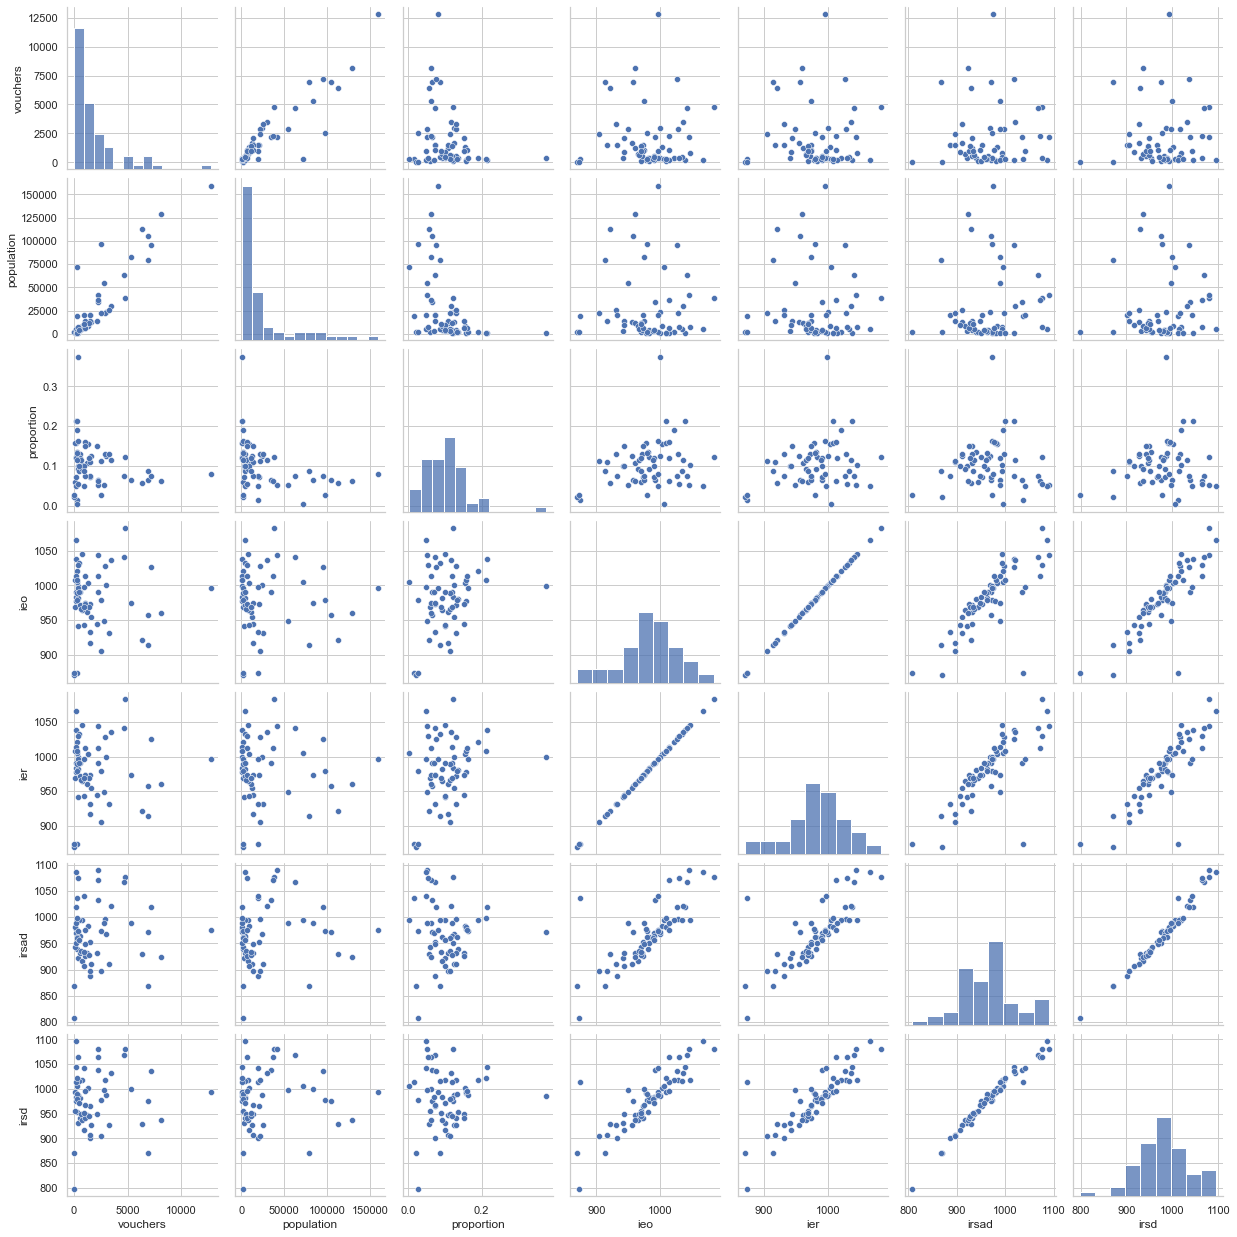

In [77]:
sns.pairplot(totalClaimed_scores)

checking the proportion row and the scores, we can't really see a relationship. 

Can try to explore it, pearson / spearman correlation, can also try to use machine learning to find correlation, check correlation matrix. 


if you cluster on the sports, can find that what regions have the most claims for the specific sports in those areas. 

# Challenge Question: Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [60]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [61]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [65]:
qld = (qld_vouchers_scores.groupby(['Club Local Government Area Name','Participation Activity']).count()).copy(deep=True)

In [66]:
qld

Application Number  \
Club Local Government Area Name Participation Activity                       
Banana (S)                      Equestrian                               1   
                                Football (Soccer)                        1   
                                Netball                                  1   
Blackall Tambo (R)              Athletics                                2   
                                Rugby League                             1   
...                                                                    ...   
Whitsunday (R)                  *Other                                   1   
                                Athletics                                1   
                                Gymnastics                               2   
                                Rugby League                            12   
                                Tennis                                   2   

                                                        Voucher Number  \
Club Local Government Area Name Participation Activity                   
Banana (S)                      Equestrian                           1   
                                Football (Soccer)                    1   
                                Netball                              1   
Blackall Tambo (R)              Athletics                            2   
                                Rugby League                         1   
...                                                                ...   
Whitsunday (R)                  *Other                               1   
                                Athletics                            1   
                                Gymnastics                           2   
                                Rugby League                        12   
                                Tennis                               2   

                                                        Child Age (at time of Application)  \
Club Local Government Area Name Participation Activity                                       
Banana (S)                      Equestrian                                               1   
                                Football (Soccer)                                        1   
                                Netball                                                  1   
Blackall Tambo (R)              Athletics                                                2   
                                Rugby League                                             1   
...                                                                                    ...   
Whitsunday (R)                  *Other                                                   1   
                                Athletics                                                1   
                                Gymnastics                                               2   
                                Rugby League                                            12   
                                Tennis                                                   2   

                                                        Gender  \
Club Local Government Area Name Participation Activity           
Banana (S)                      Equestrian                   0   
                                Football (Soccer)            0   
                                Netball                      0   
Blackall Tambo (R)              Athletics                    0   
                                Rugby League                 0   
...                                                        ...   
Whitsunday (R)                  *Other                       0   
                                Athletics                    0   
                                Gymnastics                   0   
                                Rugby League                 0   
                                Tennis                       0 

In [72]:
qldSports = pd.pivot_table(qld, values = 'Voucher Number', index = 'Club Local Government Area Name', columns = 'Participation Activity')

In [75]:
qldSports = qldSports.fillna(0)

In [74]:
qldSports

Participation Activity,*Other,Archery,Athletics,Australian Football,BMX Bicycle Motocross,Baseball,Basketball,Body Boarding,Bowls Lawn,Boxing,...,T-Ball,Table Tennis,Taekwondo,Tennis,Tenpin Bowling,Touch,Trail Bike Riding,Trampolining,Weightlifting,Zen Do Kai Martial Arts
Club Local Government Area Name,,,,,,,,,,,,,,,,,,,,,
Banana (S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blackall Tambo (R),NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brisbane (C),11.0,NaN,1.0,68.0,5.0,3.0,78.0,NaN,NaN,2.0,...,1.0,NaN,5.0,5.0,NaN,NaN,1.0,7.0,NaN,NaN
Bundaberg (R),NaN,NaN,3.0,3.0,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Burdekin (S),NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cairns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cairns (R),NaN,NaN,17.0,24.0,NaN,1.0,12.0,NaN,NaN,NaN,...,NaN,NaN,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN
Cassowary Coast (R),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
Central Highlands (R),NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
